In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

#  Load the data

In [2]:

allergies = pd.read_csv("allergies.csv")
careplans = pd.read_csv("careplans.csv")
devices = pd.read_csv("devices.csv")
imaging_studies = pd.read_csv("imaging_studies.csv")
immunizations = pd.read_csv("immunizations.csv")
payer_transitions = pd.read_csv("payer_transitions.csv")
supplies = pd.read_csv("supplies.csv")
organizations = pd.read_csv("organizations.csv")
providers = pd.read_csv("providers.csv")
payers = pd.read_csv("payers.csv")

print("allergies :\n",allergies.columns.values)
print("careplans :\n",careplans.columns.values)
print("devices :\n" ,devices.columns.values)
print("imaging_studies :\n",imaging_studies.columns.values)
print("payer_transitions :\n",payer_transitions.columns.values)
print("supplies :\n" ,supplies.columns.values)
print("immunizations :\n",immunizations.columns.values)
print("organizations :\n",organizations.columns.values)
print("providers :\n" ,providers.columns.values)
print("payerss :\n" ,payers.columns.values)

allergies :
 ['START' 'STOP' 'PATIENT' 'ENCOUNTER' 'CODE' 'DESCRIPTION']
careplans :
 ['Id' 'START' 'STOP' 'PATIENT' 'ENCOUNTER' 'CODE' 'DESCRIPTION'
 'REASONCODE' 'REASONDESCRIPTION']
devices :
 ['START' 'STOP' 'PATIENT' 'ENCOUNTER' 'CODE' 'DESCRIPTION' 'UDI']
imaging_studies :
 ['Id' 'DATE' 'PATIENT' 'ENCOUNTER' 'BODYSITE_CODE' 'BODYSITE_DESCRIPTION'
 'MODALITY_CODE' 'MODALITY_DESCRIPTION' 'SOP_CODE' 'SOP_DESCRIPTION']
payer_transitions :
 ['PATIENT' 'START_YEAR' 'END_YEAR' 'PAYER' 'OWNERSHIP']
supplies :
 ['DATE' 'PATIENT' 'ENCOUNTER' 'CODE' 'DESCRIPTION' 'QUANTITY']
immunizations :
 ['DATE' 'PATIENT' 'ENCOUNTER' 'CODE' 'DESCRIPTION' 'BASE_COST']
organizations :
 ['Id' 'NAME' 'ADDRESS' 'CITY' 'STATE' 'ZIP' 'LAT' 'LON' 'PHONE' 'REVENUE'
 'UTILIZATION']
providers :
 ['Id' 'ORGANIZATION' 'NAME' 'GENDER' 'SPECIALITY' 'ADDRESS' 'CITY' 'STATE'
 'ZIP' 'LAT' 'LON' 'UTILIZATION']
payerss :
 ['Id' 'NAME' 'ADDRESS' 'CITY' 'STATE_HEADQUARTERED' 'ZIP' 'PHONE'
 'AMOUNT_COVERED' 'AMOUNT_UNCOVERED'

<span style="color:blue">This datasets were selected because they contain essential information for most analyses involving EHR, such as patient demographics, diagnosed conditions, medical encounters, medications prescribed, lab results, and performed procedures.</span>


In [3]:
patients = pd.read_csv("patients.csv")

patients

,Id,BIRTHDATE,DEATHDATE,SSN,DRIVERS,PASSPORT,PREFIX,FIRST,LAST,SUFFIX,...,BIRTHPLACE,ADDRESS,CITY,STATE,COUNTY,ZIP,LAT,LON,HEALTHCARE_EXPENSES,HEALTHCARE_COVERAGE
0,1d604da9-9a81-4ba9-80c2-de3375d59b40,1989-05-25,NaN,999-76-6866,S99984236,X19277260X,Mr.,José Eduardo181,Gómez206,NaN,...,Marigot Saint Andrew Parish DM,427 Balistreri Way Unit 19,Chicopee,Massachusetts,Hampden County,1013.0,42.228354,-72.562951,271227.08,1334.88
1,034e9e3b-2def-4559-bb2a-7850888ae060,1983-11-14,NaN,999-73-5361,S99962402,X88275464X,Mr.,Milo271,Feil794,NaN,...,Danvers Massachusetts US,422 Farrell Path Unit 69,Somerville,Massachusetts,Middlesex County,2143.0,42.360697,-71.126531,793946.01,3204.49
2,10339b10-3cd1-4ac3-ac13-ec26728cb592,1992-06-02,NaN,999-27-3385,S99972682,X73754411X,Mr.,Jayson808,Fadel536,NaN,...,Springfield Massachusetts US,1056 Harris Lane Suite 70,Chicopee,Massachusetts,Hampden County,1020.0,42.181642,-72.608842,574111.90,2606.40
3,8d4c4326-e9de-4f45-9a4c-f8c36bff89ae,1978-05-27,NaN,999-85-4926,S99974448,X40915583X,Mrs.,Mariana775,Rutherford999,NaN,...,Yarmouth Massachusetts US,999 Kuhn Forge,Lowell,Massachusetts,Middlesex County,1851.0,42.636143,-71.343255,935630.30,8756.19
4,f5dcd418-09fe-4a2f-baa0-3da800bd8c3a,1996-10-18,NaN,999-60-7372,S99915787,X86772962X,Mr.,Gregorio366,Auer97,NaN,...,Patras Achaea GR,1050 Lindgren Extension Apt 38,Boston,Massachusetts,Suffolk County,2135.0,42.352434,-71.028610,598763.07,3772.20
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1166,023a7d29-32b3-4db5-89c8-b88bd7582ec0,1922-02-14,NaN,999-60-9291,S99949872,X45944669X,Mrs.,Conchita9,Peres371,NaN,...,Juarez Chihuahua MX,365 Gorczany Crossing Apt 64,Cambridge,Massachusetts,Middlesex County,2141.0,42.413390,-71.102083,1622314.87,32086.31
1167,1fc8dafd-90e5-44d6-9179-81156c0ea083,1977-08-08,NaN,999-29-3501,S99999143,X43299813X,Mr.,Laverne101,Hane680,NaN,...,Upton Massachusetts US,177 Volkman Heights Suite 94,Beverly,Massachusetts,Essex County,1915.0,42.573337,-70.883400,979724.25,3130.52
1168,6d048a56-edb8-4f29-891d-7a84d75a8e78,1914-09-05,2006-05-26,999-60-2184,S99940416,X26292359X,Ms.,Kimber624,Volkman526,NaN,...,Fall River Massachusetts US,583 Price Rue,Norwood,Massachusetts,Norfolk County,NaN,42.211364,-71.213621,1560540.35,52391.24
1169,fca3178e-fb68-41c3-8598-702d3ca68b96,1914-09-05,1990-03-17,999-48-3257,S99949673,X25242364X,Mrs.,Shira43,Bruen238,NaN,...,Springfield Massachusetts US,537 Boehm Course,Norwood,Massachusetts,Norfolk County,2062.0,42.167146,-71.235461,1375833.47,13157.00


In [4]:
conditions = pd.read_csv("conditions.csv")
conditions

,START,STOP,PATIENT,ENCOUNTER,CODE,DESCRIPTION
0,2001-05-01,NaN,1d604da9-9a81-4ba9-80c2-de3375d59b40,8f104aa7-4ca9-4473-885a-bba2437df588,40055000,Chronic sinusitis (disorder)
1,2011-08-09,2011-08-16,8d4c4326-e9de-4f45-9a4c-f8c36bff89ae,9d35ec9f-352a-4629-92ef-38eae38437e7,444814009,Viral sinusitis (disorder)
2,2011-11-16,2011-11-26,8d4c4326-e9de-4f45-9a4c-f8c36bff89ae,ae7555a9-eaff-4c09-98a7-21bc6ed1b1fd,195662009,Acute viral pharyngitis (disorder)
3,2011-05-13,2011-05-27,10339b10-3cd1-4ac3-ac13-ec26728cb592,e1ab4933-07a1-49f0-b4bd-05500919061d,10509002,Acute bronchitis (disorder)
4,2011-02-06,2011-02-14,f5dcd418-09fe-4a2f-baa0-3da800bd8c3a,b8f76eba-7795-4dcd-a544-f27ac2ef3d46,195662009,Acute viral pharyngitis (disorder)
...,...,...,...,...,...,...
8371,1984-12-29,NaN,fc817953-cc8b-45db-9c85-7c0ced8fa90d,87cfa8a4-126e-4c58-a839-e8b725828d0f,64859006,Osteoporosis (disorder)
8372,1988-08-24,NaN,fc817953-cc8b-45db-9c85-7c0ced8fa90d,97c0226c-92b4-4e78-b81f-4225d8473ba3,40055000,Chronic sinusitis (disorder)
8373,2009-08-08,NaN,fc817953-cc8b-45db-9c85-7c0ced8fa90d,1c91f459-adf0-4fe6-abdb-d248a91b9d85,230690007,Stroke
8374,2010-11-18,2010-11-25,fc817953-cc8b-45db-9c85-7c0ced8fa90d,8aabb13d-f4ac-4037-95ab-00e0e48a1b34,444814009,Viral sinusitis (disorder)


In [5]:
encounters = pd.read_csv("encounters.csv")
encounters

,Id,START,STOP,PATIENT,ORGANIZATION,PROVIDER,PAYER,ENCOUNTERCLASS,CODE,DESCRIPTION,BASE_ENCOUNTER_COST,TOTAL_CLAIM_COST,PAYER_COVERAGE,REASONCODE,REASONDESCRIPTION
0,d0c40d10-8d87-447e-836e-99d26ad52ea5,2010-01-23T17:45:28Z,2010-01-23T18:10:28Z,034e9e3b-2def-4559-bb2a-7850888ae060,e002090d-4e92-300e-b41e-7d1f21dee4c6,e6283e46-fd81-3611-9459-0edb1c3da357,6e2f1a2d-27bd-3701-8d08-dae202c58632,ambulatory,185345009,Encounter for symptom,129.16,129.16,54.16,10509002.0,Acute bronchitis (disorder)
1,e88bc3a9-007c-405e-aabc-792a38f4aa2b,2012-01-23T17:45:28Z,2012-01-23T18:00:28Z,034e9e3b-2def-4559-bb2a-7850888ae060,772ee193-bb9f-30eb-9939-21e86c8e4da5,6f1d59a7-a5bd-3cf9-9671-5bad2f351c28,6e2f1a2d-27bd-3701-8d08-dae202c58632,wellness,162673000,General examination of patient (procedure),129.16,129.16,129.16,NaN,NaN
2,8f104aa7-4ca9-4473-885a-bba2437df588,2001-05-01T15:02:18Z,2001-05-01T15:17:18Z,1d604da9-9a81-4ba9-80c2-de3375d59b40,5d4b9df1-93ae-3bc9-b680-03249990e558,af01a385-31d3-3c77-8fdb-2867fe88df2f,b1c428d6-4f07-31e0-90f0-68ffa6ff8c76,ambulatory,185345009,Encounter for symptom,129.16,129.16,0.00,36971009.0,Sinusitis (disorder)
3,b85c339a-6076-43ed-b9d0-9cf013dec49d,2011-07-28T15:02:18Z,2011-07-28T15:17:18Z,1d604da9-9a81-4ba9-80c2-de3375d59b40,3dc9bb2d-5d66-3e61-bf9a-e234c6433577,bb17e691-262b-3546-93d5-d88e7de93246,b1c428d6-4f07-31e0-90f0-68ffa6ff8c76,wellness,162673000,General examination of patient (procedure),129.16,129.16,0.00,NaN,NaN
4,dae2b7cb-1316-4b78-954f-fa610a6c6d0e,2010-07-27T12:58:08Z,2010-07-27T13:28:08Z,10339b10-3cd1-4ac3-ac13-ec26728cb592,b03dba4f-892f-365c-bfd1-bfcfa7a98d5d,7ed6b84a-b847-3744-9d42-15c42297a0c2,d47b3510-2895-3b70-9897-342d681c769d,wellness,162673000,General examination of patient (procedure),129.16,129.16,129.16,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
53341,bd3bfc3c-4f52-4d9c-aa01-60a084b2ddcd,2015-06-20T17:27:52Z,2015-06-20T17:57:52Z,fc817953-cc8b-45db-9c85-7c0ced8fa90d,a44b37da-aa9b-37f0-993e-26e58974e086,ff678a28-0ee8-379c-80ab-2dc790cf67dd,7caa7254-5050-3b5e-9eae-bd5ea30e809c,wellness,162673000,General examination of patient (procedure),129.16,129.16,129.16,NaN,NaN
53342,59727285-d30f-44e2-bcda-eac21ce07269,2016-06-25T17:27:52Z,2016-06-25T17:42:52Z,fc817953-cc8b-45db-9c85-7c0ced8fa90d,a44b37da-aa9b-37f0-993e-26e58974e086,ff678a28-0ee8-379c-80ab-2dc790cf67dd,7caa7254-5050-3b5e-9eae-bd5ea30e809c,wellness,162673000,General examination of patient (procedure),129.16,129.16,129.16,NaN,NaN
53343,957b13d5-49fa-4518-8c25-6eaa45e6a7d1,2017-07-01T17:27:52Z,2017-07-01T17:57:52Z,fc817953-cc8b-45db-9c85-7c0ced8fa90d,a44b37da-aa9b-37f0-993e-26e58974e086,ff678a28-0ee8-379c-80ab-2dc790cf67dd,7caa7254-5050-3b5e-9eae-bd5ea30e809c,wellness,162673000,General examination of patient (procedure),129.16,129.16,129.16,NaN,NaN
53344,5529a0d5-a24c-42b4-a32a-729e4d1f19ef,2018-07-07T17:27:52Z,2018-07-07T17:42:52Z,fc817953-cc8b-45db-9c85-7c0ced8fa90d,a44b37da-aa9b-37f0-993e-26e58974e086,ff678a28-0ee8-379c-80ab-2dc790cf67dd,7caa7254-5050-3b5e-9eae-bd5ea30e809c,wellness,162673000,General examination of patient (procedure),129.16,129.16,129.16,NaN,NaN


In [6]:
medications = pd.read_csv("medications.csv")
medications

,START,STOP,PATIENT,PAYER,ENCOUNTER,CODE,DESCRIPTION,BASE_COST,PAYER_COVERAGE,DISPENSES,TOTALCOST,REASONCODE,REASONDESCRIPTION
0,2010-05-05T00:26:23Z,2011-04-30T00:26:23Z,8d4c4326-e9de-4f45-9a4c-f8c36bff89ae,b1c428d6-4f07-31e0-90f0-68ffa6ff8c76,1e0d6b0e-1711-4a25-99f9-b1c700c9b260,389221,Etonogestrel 68 MG Drug Implant,677.08,0.0,12,8124.96,NaN,NaN
1,2011-04-30T00:26:23Z,2012-04-24T00:26:23Z,8d4c4326-e9de-4f45-9a4c-f8c36bff89ae,b1c428d6-4f07-31e0-90f0-68ffa6ff8c76,6aa37300-d1b4-48e7-a2f8-5e0f70f48f38,389221,Etonogestrel 68 MG Drug Implant,624.09,0.0,12,7489.08,NaN,NaN
2,2012-04-24T00:26:23Z,2013-04-19T00:26:23Z,8d4c4326-e9de-4f45-9a4c-f8c36bff89ae,b1c428d6-4f07-31e0-90f0-68ffa6ff8c76,7253a9f9-6f6d-429a-926a-7b1d424eae3f,748856,Yaz 28 Day Pack,43.32,0.0,12,519.84,NaN,NaN
3,2011-05-13T12:58:08Z,2011-05-27T12:58:08Z,10339b10-3cd1-4ac3-ac13-ec26728cb592,d47b3510-2895-3b70-9897-342d681c769d,e1ab4933-07a1-49f0-b4bd-05500919061d,313782,Acetaminophen 325 MG Oral Tablet,8.14,0.0,1,8.14,10509002.0,Acute bronchitis (disorder)
4,2011-12-08T15:02:18Z,2011-12-22T15:02:18Z,1d604da9-9a81-4ba9-80c2-de3375d59b40,b1c428d6-4f07-31e0-90f0-68ffa6ff8c76,792fae81-a007-44b0-8221-46953737b089,562251,Amoxicillin 250 MG / Clavulanate 125 MG Oral T...,11.91,0.0,1,11.91,444814009.0,Viral sinusitis (disorder)
...,...,...,...,...,...,...,...,...,...,...,...,...,...
42984,1983-09-08T17:27:52Z,1983-09-29T17:27:52Z,fca3178e-fb68-41c3-8598-702d3ca68b96,7caa7254-5050-3b5e-9eae-bd5ea30e809c,9e9670e5-da7f-4111-98a6-21d5e0aadd86,243670,Aspirin 81 MG Oral Tablet,7.35,0.0,1,7.35,NaN,NaN
42985,1984-09-23T17:27:52Z,1984-11-22T17:27:52Z,fca3178e-fb68-41c3-8598-702d3ca68b96,7caa7254-5050-3b5e-9eae-bd5ea30e809c,8d7d70be-467d-430f-8497-25aa2c1276b8,313782,Acetaminophen 325 MG Oral Tablet,5.26,0.0,2,10.52,NaN,NaN
42986,1987-09-27T17:27:52Z,NaN,fca3178e-fb68-41c3-8598-702d3ca68b96,7caa7254-5050-3b5e-9eae-bd5ea30e809c,48ea35a8-37cd-41d2-86c1-7785b514c453,866414,24 HR metoprolol succinate 100 MG Extended Rel...,263.49,0.0,30,7904.70,88805009.0,Chronic congestive heart failure (disorder)
42987,1987-09-27T17:27:52Z,NaN,fca3178e-fb68-41c3-8598-702d3ca68b96,7caa7254-5050-3b5e-9eae-bd5ea30e809c,48ea35a8-37cd-41d2-86c1-7785b514c453,313988,Furosemide 40 MG Oral Tablet,263.49,0.0,30,7904.70,88805009.0,Chronic congestive heart failure (disorder)


In [7]:
observations = pd.read_csv("observations.csv")
observations

,DATE,PATIENT,ENCOUNTER,CODE,DESCRIPTION,VALUE,UNITS,TYPE
0,2012-01-23T17:45:28Z,034e9e3b-2def-4559-bb2a-7850888ae060,e88bc3a9-007c-405e-aabc-792a38f4aa2b,8302-2,Body Height,193.3,cm,numeric
1,2012-01-23T17:45:28Z,034e9e3b-2def-4559-bb2a-7850888ae060,e88bc3a9-007c-405e-aabc-792a38f4aa2b,72514-3,Pain severity - 0-10 verbal numeric rating [Sc...,2.0,{score},numeric
2,2012-01-23T17:45:28Z,034e9e3b-2def-4559-bb2a-7850888ae060,e88bc3a9-007c-405e-aabc-792a38f4aa2b,29463-7,Body Weight,87.8,kg,numeric
3,2012-01-23T17:45:28Z,034e9e3b-2def-4559-bb2a-7850888ae060,e88bc3a9-007c-405e-aabc-792a38f4aa2b,39156-5,Body Mass Index,23.5,kg/m2,numeric
4,2012-01-23T17:45:28Z,034e9e3b-2def-4559-bb2a-7850888ae060,e88bc3a9-007c-405e-aabc-792a38f4aa2b,8462-4,Diastolic Blood Pressure,82.0,mm[Hg],numeric
...,...,...,...,...,...,...,...,...
299692,2015-09-05T16:27:52Z,fc817953-cc8b-45db-9c85-7c0ced8fa90d,NaN,QOLS,QOLS,1.0,{score},numeric
299693,2016-09-05T16:27:52Z,fc817953-cc8b-45db-9c85-7c0ced8fa90d,NaN,QOLS,QOLS,1.0,{score},numeric
299694,2017-09-05T16:27:52Z,fc817953-cc8b-45db-9c85-7c0ced8fa90d,NaN,QOLS,QOLS,1.0,{score},numeric
299695,2018-09-05T16:27:52Z,fc817953-cc8b-45db-9c85-7c0ced8fa90d,NaN,QOLS,QOLS,1.0,{score},numeric


In [8]:
procedures = pd.read_csv("procedures.csv")
procedures

,DATE,PATIENT,ENCOUNTER,CODE,DESCRIPTION,BASE_COST,REASONCODE,REASONDESCRIPTION
0,2011-04-30T00:26:23Z,8d4c4326-e9de-4f45-9a4c-f8c36bff89ae,6aa37300-d1b4-48e7-a2f8-5e0f70f48f38,169553002,Insertion of subcutaneous contraceptive,14896.56,NaN,NaN
1,2010-07-27T12:58:08Z,10339b10-3cd1-4ac3-ac13-ec26728cb592,dae2b7cb-1316-4b78-954f-fa610a6c6d0e,430193006,Medication Reconciliation (procedure),726.51,NaN,NaN
2,2010-11-20T03:04:34Z,f5dcd418-09fe-4a2f-baa0-3da800bd8c3a,7ff86631-0378-4bfc-92ce-1edd697eb18e,430193006,Medication Reconciliation (procedure),788.50,NaN,NaN
3,2011-02-07T03:04:34Z,f5dcd418-09fe-4a2f-baa0-3da800bd8c3a,b8f76eba-7795-4dcd-a544-f27ac2ef3d46,117015009,Throat culture (procedure),2070.44,195662009.0,Acute viral pharyngitis (disorder)
4,2011-04-19T03:04:34Z,f5dcd418-09fe-4a2f-baa0-3da800bd8c3a,640837d9-845a-433c-9fad-47426664a69d,117015009,Throat culture (procedure),2479.39,195662009.0,Acute viral pharyngitis (disorder)
...,...,...,...,...,...,...,...,...
34976,2010-05-22T17:27:52Z,fc817953-cc8b-45db-9c85-7c0ced8fa90d,4718c69a-f0d3-4973-be8b-6d65c900451f,430193006,Medication Reconciliation (procedure),581.88,NaN,NaN
34977,2013-06-08T17:27:52Z,fc817953-cc8b-45db-9c85-7c0ced8fa90d,f4d4f19e-6377-4627-8a6f-760beba1fc6b,430193006,Medication Reconciliation (procedure),427.71,NaN,NaN
34978,2015-06-20T17:27:52Z,fc817953-cc8b-45db-9c85-7c0ced8fa90d,bd3bfc3c-4f52-4d9c-aa01-60a084b2ddcd,430193006,Medication Reconciliation (procedure),397.80,NaN,NaN
34979,2017-07-01T17:27:52Z,fc817953-cc8b-45db-9c85-7c0ced8fa90d,957b13d5-49fa-4518-8c25-6eaa45e6a7d1,430193006,Medication Reconciliation (procedure),346.55,NaN,NaN


# <span style="color:black; font-weight:bold">Explore the data and make a visualization of a single patient trajectory as she transitions through the medical care system over time</span>


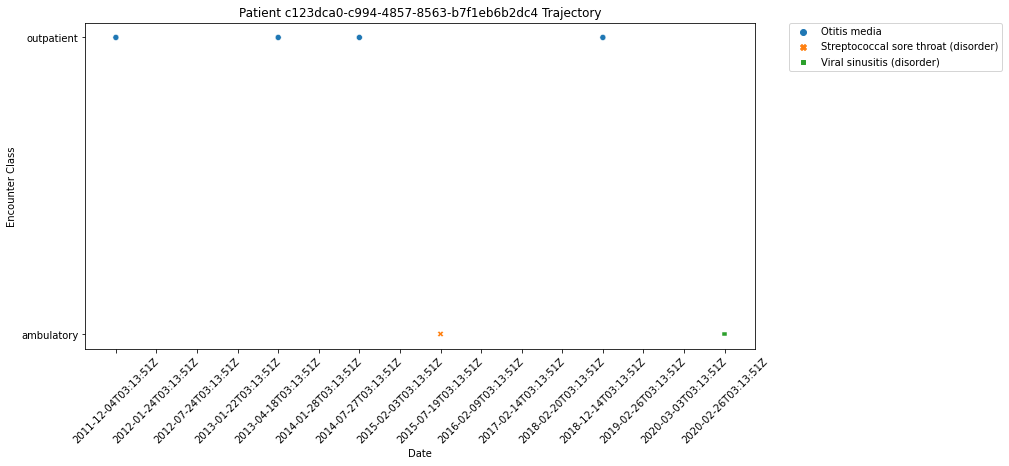

In [9]:
def plot_patient_trajectory(patient_id, patients, conditions, encounters):
    patient_encounters = encounters.loc[encounters['PATIENT'] == patient_id]

    plt.figure(figsize=(12, 6))
    sns.scatterplot(data=patient_encounters, x='START', y='ENCOUNTERCLASS', hue='REASONDESCRIPTION', style='REASONDESCRIPTION')
    plt.title(f"Patient {patient_id} Trajectory")
    plt.xlabel("Date")
    plt.xticks(rotation=45)
    plt.ylabel("Encounter Class")
    plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
    plt.show()

# Here randomly select the patient's ID from "Patients"
patient_id = patients.sample().iloc[0]['Id']

# Or here select a patient ID from the 'patients' 
# patient_id = 'fca3178e-fb68-41c3-8598-702d3ca68b96'                                              
plot_patient_trajectory(patient_id, patients, conditions, encounters)





In [10]:
patient_details = patients.loc[patients['Id'] == patient_id]
patient_details


,Id,BIRTHDATE,DEATHDATE,SSN,DRIVERS,PASSPORT,PREFIX,FIRST,LAST,SUFFIX,...,BIRTHPLACE,ADDRESS,CITY,STATE,COUNTY,ZIP,LAT,LON,HEALTHCARE_EXPENSES,HEALTHCARE_COVERAGE
857,c123dca0-c994-4857-8563-b7f1eb6b2dc4,2009-02-16,NaN,999-30-5097,NaN,NaN,NaN,Jeffie441,Daniel959,NaN,...,Woburn Massachusetts US,483 Hoeger Orchard,Lowell,Massachusetts,Middlesex County,1850.0,42.677558,-71.317899,234771.65,2730.68


In [11]:
patient_details = patients.loc[patients['Id'] == patient_id, ['Id', 'BIRTHDATE', 'RACE', 'GENDER']]
patient_details


,Id,BIRTHDATE,RACE,GENDER
857,c123dca0-c994-4857-8563-b7f1eb6b2dc4,2009-02-16,white,F



# <span style="color:black; font-weight:bold">The three most common conditions (present graphs and numbers)</span>



There are 129 unique condition codes in the dataset.
The three most common conditions in the dataset are:
Viral sinusitis : 1248
Acute viral pharyngitis : 653
Acute bronchitis : 563


C:\Users\nadra\AppData\Local\Temp\ipykernel_3528\1811562296.py:16: FutureWarning: The default value of regex will change from True to False in a future version.
  for condition, count in zip(common_conditions.index.str.replace('\(disorder\)', ''), common_conditions):


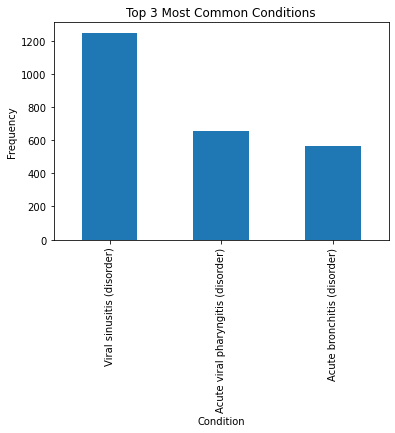

In [12]:

# Print the number of unique condition codes
unique_condition_codes = conditions['CODE'].nunique()
print('\033[1m'+ f"There are {unique_condition_codes} unique condition codes in the dataset." + '\033[95m')


# Count the number of occurrences of each unique condition code using a group-by operation
condition_counts = conditions.groupby('CODE').size().reset_index(name='counts')

# Sort the condition_counts DataFrame in descending order by count and select the top 3 conditions
top_conditions = condition_counts.sort_values('counts', ascending=False).head(3)

# Print the top 3 conditions and their respective counts
print('\033[1m'+"The three most common conditions in the dataset are:" + '\033[95m')

common_conditions = conditions['DESCRIPTION'].value_counts().nlargest(3)
for condition, count in zip(common_conditions.index.str.replace('\(disorder\)', ''), common_conditions):
    print(f"{condition}: {count}")



common_conditions.plot(kind='bar')
plt.title("Top 3 Most Common Conditions")
plt.xlabel("Condition")
plt.ylabel("Frequency")
plt.show()

# <span style="color:black; font-weight:bold">How the three conditions are treated</span>


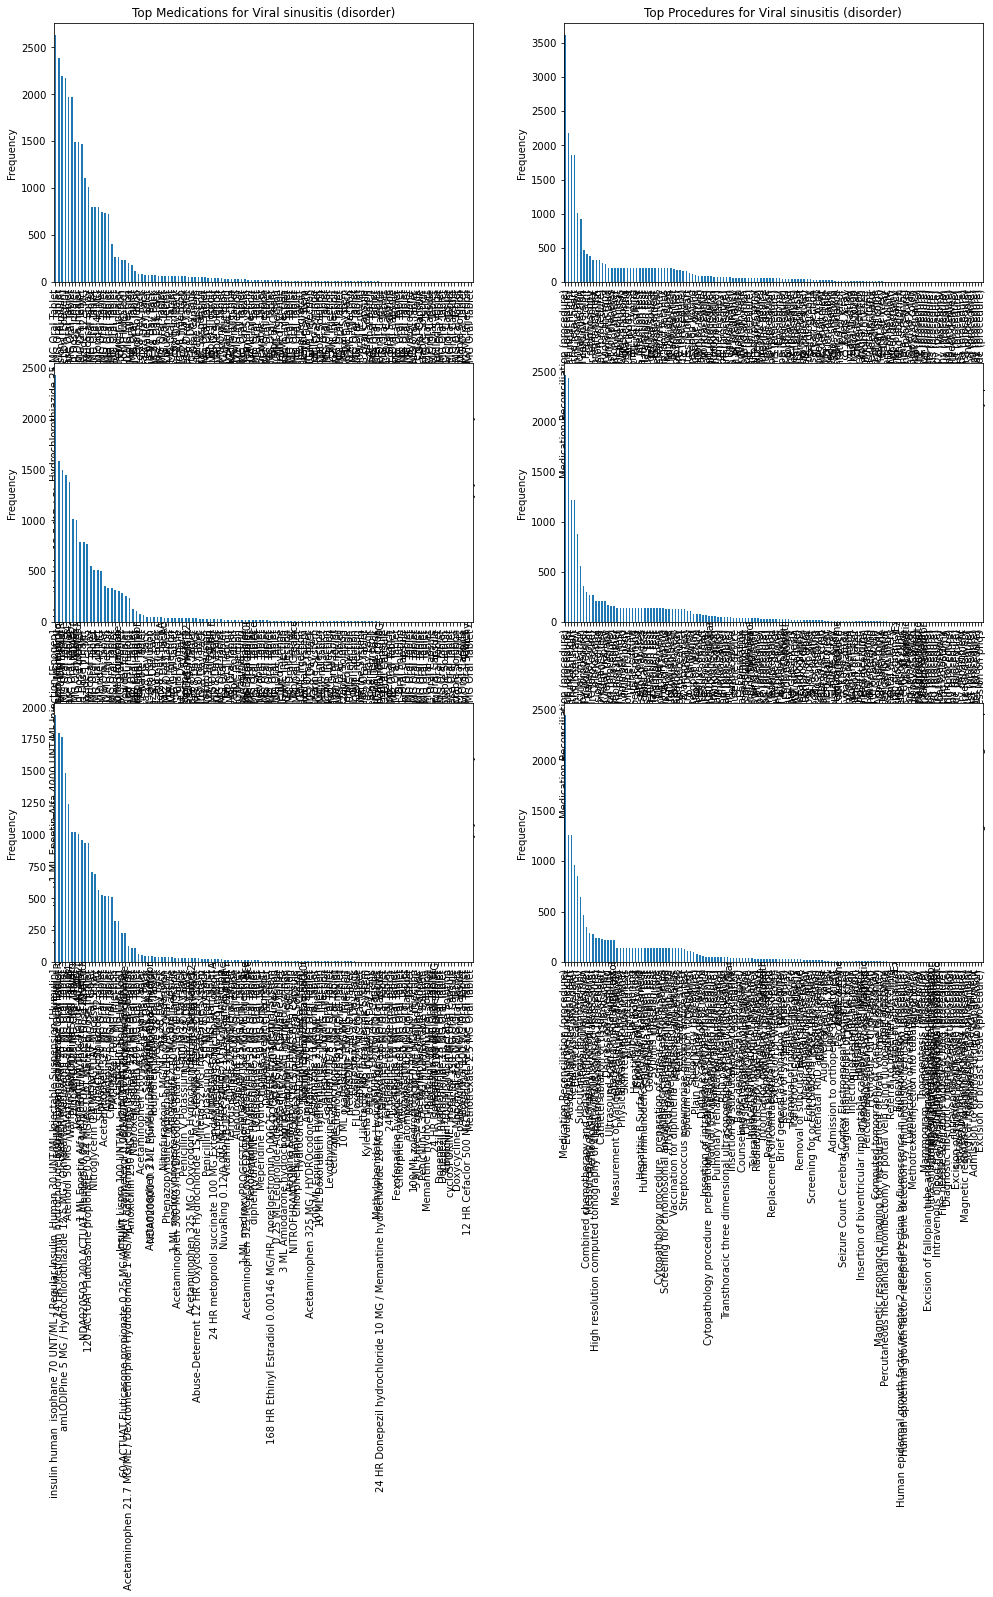

In [13]:
def compare_treatments(condition_1, condition_2, condition_3, conditions, medications, procedures):
    cond1_patients = conditions.loc[conditions['DESCRIPTION'] == condition_1, 'PATIENT']
    cond2_patients = conditions.loc[conditions['DESCRIPTION'] == condition_2, 'PATIENT']
    cond3_patients = conditions.loc[conditions['DESCRIPTION'] == condition_3, 'PATIENT']

    meds1 = medications.loc[medications['PATIENT'].isin(cond1_patients), 'DESCRIPTION'].value_counts()
    meds2 = medications.loc[medications['PATIENT'].isin(cond2_patients), 'DESCRIPTION'].value_counts()
    meds3 = medications.loc[medications['PATIENT'].isin(cond3_patients), 'DESCRIPTION'].value_counts()
    proc1 = procedures.loc[procedures['PATIENT'].isin(cond1_patients), 'DESCRIPTION'].value_counts()
    proc2 = procedures.loc[procedures['PATIENT'].isin(cond2_patients), 'DESCRIPTION'].value_counts()
    proc3 = procedures.loc[procedures['PATIENT'].isin(cond3_patients), 'DESCRIPTION'].value_counts()

    fig, axes = plt.subplots(3, 2, figsize=(15, 15))
    fig.tight_layout(pad=6)

    meds1.plot(kind='bar', ax=axes[0, 0])
    axes[0, 0].set_title(f"Top Medications for {condition_1}")
    axes[0, 0].set_ylabel("Frequency")
    meds2.plot(kind='bar', ax=axes[1, 0])
    axes[1, 0].set_title(f"Top Medications for {condition_2}")
    axes[1, 0].set_ylabel("Frequency")
    meds3.plot(kind='bar', ax=axes[2, 0])
    axes[2, 0].set_title(f"Top Medications for {condition_3}")
    axes[2, 0].set_ylabel("Frequency")

    proc1.plot(kind='bar',ax=axes[0, 1])
    axes[0, 1].set_title(f"Top Procedures for {condition_1}")
    axes[0, 1].set_ylabel("Frequency")
    proc2.plot(kind='bar', ax=axes[1, 1])
    axes[1, 1].set_title(f"Top Procedures for {condition_2}")
    axes[1, 1].set_ylabel("Frequency")
    proc3.plot(kind='bar', ax=axes[2, 1])
    axes[2, 1].set_title(f"Top Procedures for {condition_3}")
    axes[2, 1].set_ylabel("Frequency")
    plt.show()


top_conditions = common_conditions.index.tolist()
compare_treatments(top_conditions[0], top_conditions[1], top_conditions[2], conditions, medications, procedures) 


# Top 10 medications for each condition

Top 10 Medications Prescribed for:


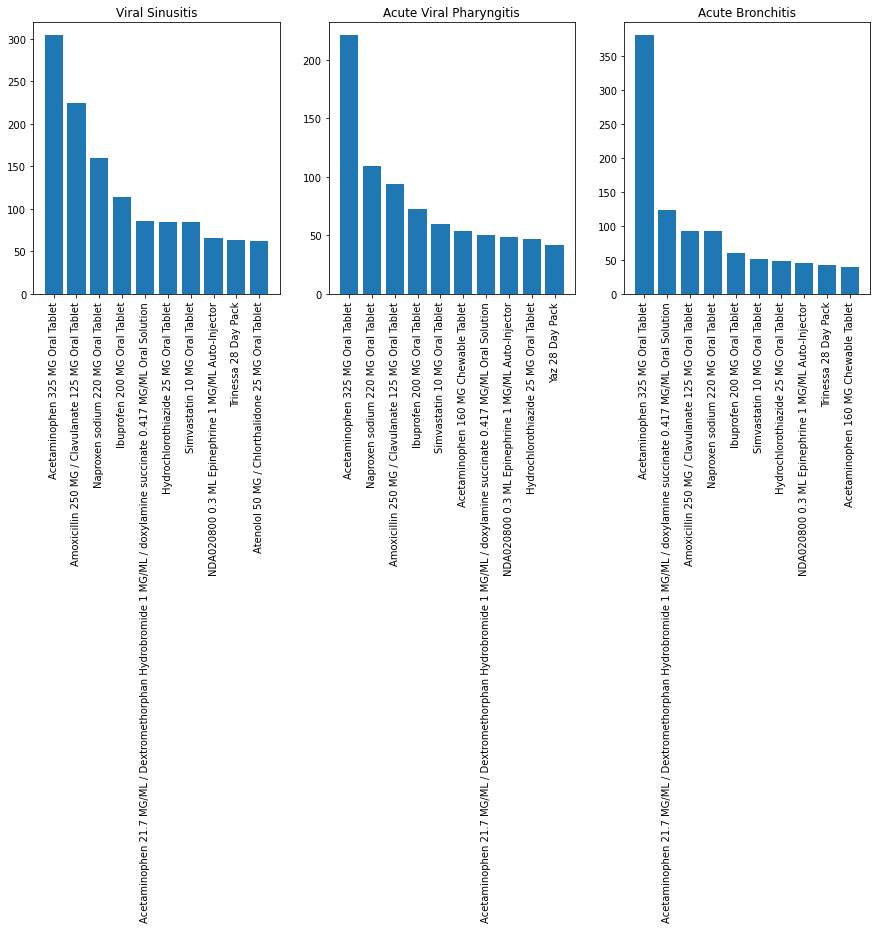


Top 10 Medications Prescribed for Viral Sinusitis

Acetaminophen 325 MG Oral Tablet                                                                                     304
Amoxicillin 250 MG / Clavulanate 125 MG Oral Tablet                                                                  224
Naproxen sodium 220 MG Oral Tablet                                                                                   160
Ibuprofen 200 MG Oral Tablet                                                                                         114
Acetaminophen 21.7 MG/ML / Dextromethorphan Hydrobromide 1 MG/ML / doxylamine succinate 0.417 MG/ML Oral Solution     86
Hydrochlorothiazide 25 MG Oral Tablet                                                                                 85
Simvastatin 10 MG Oral Tablet                                                                                         85
NDA020800 0.3 ML Epinephrine 1 MG/ML Auto-Injector                                                   

In [14]:
# Filter conditions dataframe for the three conditions of interest
df_filtered = conditions[
    conditions['DESCRIPTION'].isin(
        [
            'Viral sinusitis (disorder)', 
            'Acute viral pharyngitis (disorder)', 
            'Acute bronchitis (disorder)'
        ]
    )
]

# Merge filtered conditions dataframe with medications and procedures dataframes
df_filtered = pd.merge(df_filtered, medications, on='PATIENT')
# df_filtered1 = pd.merge(df_filtered, procedures, on='PATIENT')

# Top medications for each condition
viral_meds = df_filtered[
    df_filtered['DESCRIPTION_x'] == 'Viral sinusitis (disorder)'
].groupby('DESCRIPTION_y')['PATIENT'].nunique().sort_values(ascending=False).head(10)

pharyngitis_meds = df_filtered[
    df_filtered['DESCRIPTION_x'] == 'Acute viral pharyngitis (disorder)'
].groupby('DESCRIPTION_y')['PATIENT'].nunique().sort_values(ascending=False).head(10)

bronchitis_meds = df_filtered[
    df_filtered['DESCRIPTION_x'] == 'Acute bronchitis (disorder)'
].groupby('DESCRIPTION_y')['PATIENT'].nunique().sort_values(ascending=False).head(10)


plt.figure(figsize=(15, 5))
print('\033[1m'+'Top 10 Medications Prescribed for:'+'\033[0m')
plt.subplot(1, 3, 1)
plt.bar(viral_meds.index, viral_meds.values)
plt.title('Viral Sinusitis')
plt.xticks(rotation=90)

plt.subplot(1, 3, 2)
plt.bar(pharyngitis_meds.index, pharyngitis_meds.values)
plt.title('Acute Viral Pharyngitis')
plt.xticks(rotation=90)

plt.subplot(1, 3, 3)
plt.bar(bronchitis_meds.index, bronchitis_meds.values)
plt.title('Acute Bronchitis')
plt.xticks(rotation=90)

plt.show()

# df_filtered

print('\033[1m'+ '\nTop 10 Medications Prescribed for '+ '\033[95m' + 'Viral Sinusitis\n' + '\033[0m')
print(viral_meds.to_string(header=False))
print('\033[1m'+ '\nTop 10 Medications Prescribed for '+ '\033[95m' + 'Acute Viral Pharyngitis\n' + '\033[0m')
print(pharyngitis_meds.to_string(header=False))
print('\033[1m'+ '\nTop 10 Medications Prescribed for '+ '\033[95m' + 'Acute Bronchitis\n' + '\033[0m')
print(bronchitis_meds.to_string(header=False))

<span style="color:blue">Similarities in how the three conditions are treated (Medications Prescribed)</span>


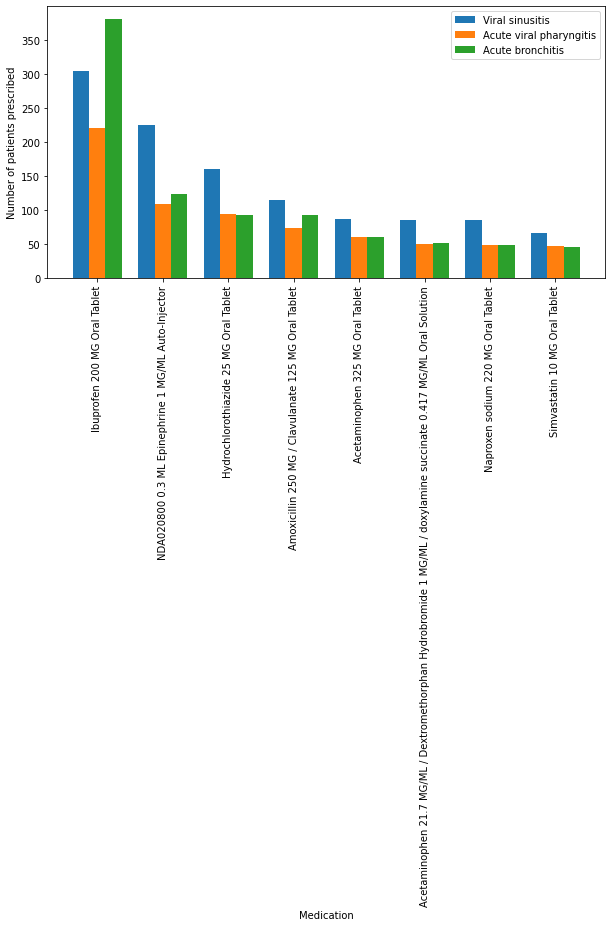

In [15]:
# Get the medications that are common across the three conditions
common_meds = set(viral_meds.index).intersection(set(pharyngitis_meds.index)).intersection(set(bronchitis_meds.index))

# Get the number of patients prescribed each medication for each condition
viral_meds_counts = df_filtered[df_filtered['DESCRIPTION_y'].isin(common_meds) & (df_filtered['DESCRIPTION_x'] == 'Viral sinusitis (disorder)')].groupby('DESCRIPTION_y')['PATIENT'].nunique().sort_values(ascending=False)
pharyngitis_meds_counts = df_filtered[df_filtered['DESCRIPTION_y'].isin(common_meds) & (df_filtered['DESCRIPTION_x'] == 'Acute viral pharyngitis (disorder)')].groupby('DESCRIPTION_y')['PATIENT'].nunique().sort_values(ascending=False)
bronchitis_meds_counts = df_filtered[df_filtered['DESCRIPTION_y'].isin(common_meds) & (df_filtered['DESCRIPTION_x'] == 'Acute bronchitis (disorder)')].groupby('DESCRIPTION_y')['PATIENT'].nunique().sort_values(ascending=False)

# Create a grouped bar chart
plt.figure(figsize=(10, 5))

x = np.arange(len(common_meds))
width = 0.25

plt.bar(x - width, viral_meds_counts.values, width, label='Viral sinusitis')
plt.bar(x, pharyngitis_meds_counts.values, width, label='Acute viral pharyngitis')
plt.bar(x + width, bronchitis_meds_counts.values, width, label='Acute bronchitis')

plt.xticks(x, common_meds, rotation=90)
plt.xlabel('Medication')
plt.ylabel('Number of patients prescribed')
plt.legend()

plt.show()


# Top 10 Procedures  for each condition

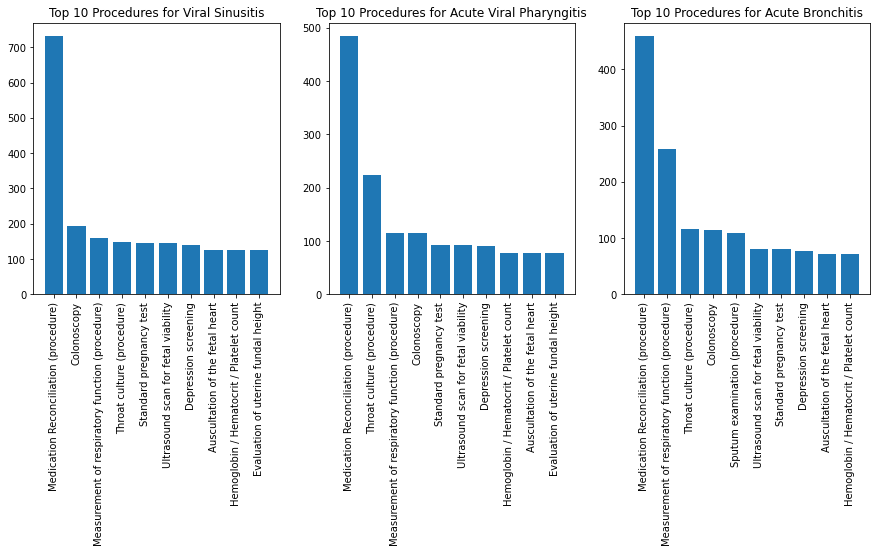


Top 10 Procedures for Viral Sinusitis

Medication Reconciliation (procedure)              733
Colonoscopy                                        193
Measurement of respiratory function (procedure)    161
Throat culture (procedure)                         149
Standard pregnancy test                            146
Ultrasound scan for fetal viability                146
Depression screening                               141
Auscultation of the fetal heart                    125
Hemoglobin / Hematocrit / Platelet count           125
Evaluation of uterine fundal height                125

Top 10 Procedures for Acute Viral Pharyngitis

Medication Reconciliation (procedure)              485
Throat culture (procedure)                         223
Measurement of respiratory function (procedure)    116
Colonoscopy                                        116
Standard pregnancy test                             92
Ultrasound scan for fetal viability                 92
Depression screening            

In [16]:
# Filter conditions dataframe for the three conditions of interest
df_filtered = conditions[
    conditions['DESCRIPTION'].isin(
        [
            'Viral sinusitis (disorder)',
            'Acute viral pharyngitis (disorder)',
            'Acute bronchitis (disorder)'
        ]
    )
]


# Merge filtered conditions dataframe with procedures dataframe
df_filtered = pd.merge(df_filtered, procedures, on='PATIENT')

# Top procedures for each condition
viral_procs = df_filtered[df_filtered['DESCRIPTION_x'] == 'Viral sinusitis (disorder)'].groupby('DESCRIPTION_y')['PATIENT'].nunique().sort_values(ascending=False).head(10)
pharyngitis_procs = df_filtered[df_filtered['DESCRIPTION_x'] == 'Acute viral pharyngitis (disorder)'].groupby('DESCRIPTION_y')['PATIENT'].nunique().sort_values(ascending=False).head(10)
bronchitis_procs = df_filtered[df_filtered['DESCRIPTION_x'] == 'Acute bronchitis (disorder)'].groupby('DESCRIPTION_y')['PATIENT'].nunique().sort_values(ascending=False).head(10)

# Create bar charts
plt.figure(figsize=(15, 5))

plt.subplot(1, 3, 1)
plt.bar(viral_procs.index, viral_procs.values)
plt.title('Top 10 Procedures for Viral Sinusitis')
plt.xticks(rotation=90)

plt.subplot(1, 3, 2)
plt.bar(pharyngitis_procs.index, pharyngitis_procs.values)
plt.title('Top 10 Procedures for Acute Viral Pharyngitis')
plt.xticks(rotation=90)

plt.subplot(1, 3, 3)
plt.bar(bronchitis_procs.index, bronchitis_procs.values)
plt.title('Top 10 Procedures for Acute Bronchitis')
plt.xticks(rotation=90)

plt.show()

print('\033[1m'+ '\nTop 10 Procedures for '+ '\033[95m' + 'Viral Sinusitis\n' + '\033[0m')
print(viral_procs.to_string(header=False))
print('\033[1m'+ '\nTop 10 Procedures for '+ '\033[95m' + 'Acute Viral Pharyngitis\n' + '\033[0m')
print(pharyngitis_procs.to_string(header=False))
print('\033[1m'+ '\nTop 10 Procedures for '+ '\033[95m' + 'Acute Bronchitis\n' + '\033[0m')
print(bronchitis_procs.to_string(header=False))

<span style="color:blue">Similarities in how the three conditions are treated (Procedures)</span>

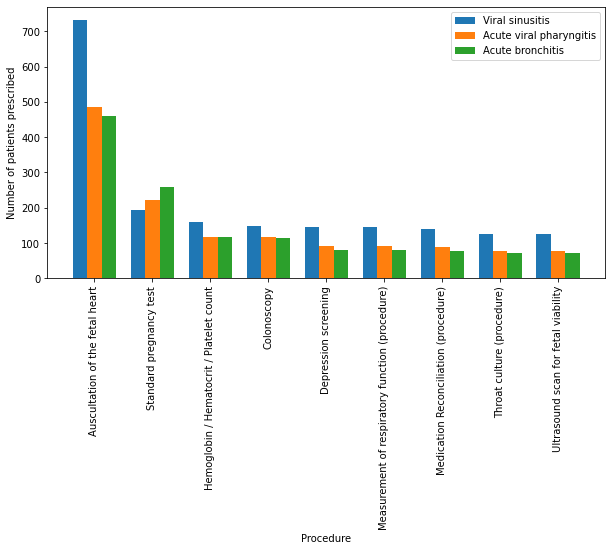

In [17]:
# Get the procedures that are common across the three conditions
common_procs = set(viral_procs.index).intersection(set(pharyngitis_procs.index)).intersection(set(bronchitis_procs.index))

# Get the number of patients prescribed each procedure for each condition
viral_procs_counts = df_filtered[
    df_filtered['DESCRIPTION_y'].isin(common_procs) 
    & (df_filtered['DESCRIPTION_x'] == 'Viral sinusitis (disorder)')
].groupby('DESCRIPTION_y')['PATIENT'].nunique().sort_values(ascending=False)

pharyngitis_procs_counts = df_filtered[
    df_filtered['DESCRIPTION_y'].isin(common_procs) & (df_filtered['DESCRIPTION_x'] == 'Acute viral pharyngitis (disorder)')
].groupby('DESCRIPTION_y')['PATIENT'].nunique().sort_values(ascending=False)

bronchitis_procs_counts = df_filtered[
    df_filtered['DESCRIPTION_y'].isin(common_procs) & (df_filtered['DESCRIPTION_x'] == 'Acute bronchitis (disorder)')
].groupby('DESCRIPTION_y')['PATIENT'].nunique().sort_values(ascending=False)

# Create a grouped bar chart
plt.figure(figsize=(10, 5))

x = np.arange(len(common_procs))
width = 0.25

plt.bar(x - width, viral_procs_counts.values, width, label='Viral sinusitis')
plt.bar(x, pharyngitis_procs_counts.values, width, label='Acute viral pharyngitis')
plt.bar(x + width, bronchitis_procs_counts.values, width, label='Acute bronchitis')

plt.xticks(x, common_procs, rotation=90)
plt.xlabel('Procedure')
plt.ylabel('Number of patients prescribed')
plt.legend()

plt.show()



# <span style="color:black; font-weight:bold">Other common pattern characteristics of the three groups of conditions</span>


In [18]:
# distribution as numbers
def condition_demographics(condition, patients, conditions):
    condition_patients = conditions.loc[conditions['DESCRIPTION'] == condition, 'PATIENT']
    demographics = patients.loc[patients['Id'].isin(condition_patients), ['GENDER', 'RACE', 'ETHNICITY', 'BIRTHDATE']]
    demographics['AGE'] = (pd.to_datetime('now') - pd.to_datetime(demographics['BIRTHDATE'])).astype('<m8[Y]').astype(int)
    demographics.drop(columns=['BIRTHDATE'], inplace=True)
    return demographics

for i, condition in enumerate(top_conditions):
    demographics = condition_demographics(condition, patients, conditions)
    
     
    
    tmp = condition.replace('(disorder)', '')

    print(f"Age Distribution for {tmp}:")
    age_counts = demographics['AGE'].value_counts().sort_index()
    for age, count in age_counts.items():
        print(f"{age} years: {count} patients")
    print()

    print(f"Gender Distribution for {tmp}:")
    gender_counts = demographics['GENDER'].value_counts()
    for gender, count in gender_counts.items():
        print(f"{gender}: {count} patients")
    print()

    print(f"Race Distribution for {tmp}:")
    race_counts = demographics['RACE'].value_counts()
    for race, count in race_counts.items():
        print(f"{race}: {count} patients")
    print()





C:\Users\nadra\AppData\Local\Temp\ipykernel_3528\2016516724.py:5: FutureWarning: The parsing of 'now' in pd.to_datetime without `utc=True` is deprecated. In a future version, this will match Timestamp('now') and Timestamp.now()
  demographics['AGE'] = (pd.to_datetime('now') - pd.to_datetime(demographics['BIRTHDATE'])).astype('<m8[Y]').astype(int)
C:\Users\nadra\AppData\Local\Temp\ipykernel_3528\2016516724.py:5: FutureWarning: The parsing of 'now' in pd.to_datetime without `utc=True` is deprecated. In a future version, this will match Timestamp('now') and Timestamp.now()
  demographics['AGE'] = (pd.to_datetime('now') - pd.to_datetime(demographics['BIRTHDATE'])).astype('<m8[Y]').astype(int)
C:\Users\nadra\AppData\Local\Temp\ipykernel_3528\2016516724.py:5: FutureWarning: The parsing of 'now' in pd.to_datetime without `utc=True` is deprecated. In a future version, this will match Timestamp('now') and Timestamp.now()
  demographics['AGE'] = (pd.to_datetime('now') - pd.to_datetime(demographi

Age Distribution for Viral sinusitis :
4 years: 2 patients
5 years: 1 patients
6 years: 5 patients
7 years: 5 patients
8 years: 4 patients
9 years: 2 patients
10 years: 6 patients
11 years: 4 patients
12 years: 8 patients
13 years: 10 patients
14 years: 13 patients
15 years: 5 patients
16 years: 6 patients
17 years: 4 patients
18 years: 13 patients
19 years: 14 patients
20 years: 11 patients
21 years: 6 patients
22 years: 9 patients
23 years: 11 patients
24 years: 11 patients
25 years: 10 patients
26 years: 10 patients
27 years: 8 patients
28 years: 12 patients
29 years: 12 patients
30 years: 14 patients
31 years: 6 patients
32 years: 8 patients
33 years: 8 patients
34 years: 6 patients
35 years: 6 patients
36 years: 11 patients
37 years: 7 patients
38 years: 10 patients
39 years: 8 patients
40 years: 7 patients
41 years: 13 patients
42 years: 6 patients
43 years: 11 patients
44 years: 7 patients
45 years: 13 patients
46 years: 10 patients
47 years: 8 patients
48 years: 13 patients
49 

C:\Users\nadra\AppData\Local\Temp\ipykernel_3528\2016516724.py:5: FutureWarning: The parsing of 'now' in pd.to_datetime without `utc=True` is deprecated. In a future version, this will match Timestamp('now') and Timestamp.now()
  demographics['AGE'] = (pd.to_datetime('now') - pd.to_datetime(demographics['BIRTHDATE'])).astype('<m8[Y]').astype(int)
C:\Users\nadra\AppData\Local\Temp\ipykernel_3528\11536384.py:4: FutureWarning: The parsing of 'now' in pd.to_datetime without `utc=True` is deprecated. In a future version, this will match Timestamp('now') and Timestamp.now()
  demographics['AGE'] = (pd.to_datetime('now') - pd.to_datetime(demographics['BIRTHDATE'])).astype('<m8[Y]').astype(int)
C:\Users\nadra\AppData\Local\Temp\ipykernel_3528\2016516724.py:5: FutureWarning: The parsing of 'now' in pd.to_datetime without `utc=True` is deprecated. In a future version, this will match Timestamp('now') and Timestamp.now()
  demographics['AGE'] = (pd.to_datetime('now') - pd.to_datetime(demographics

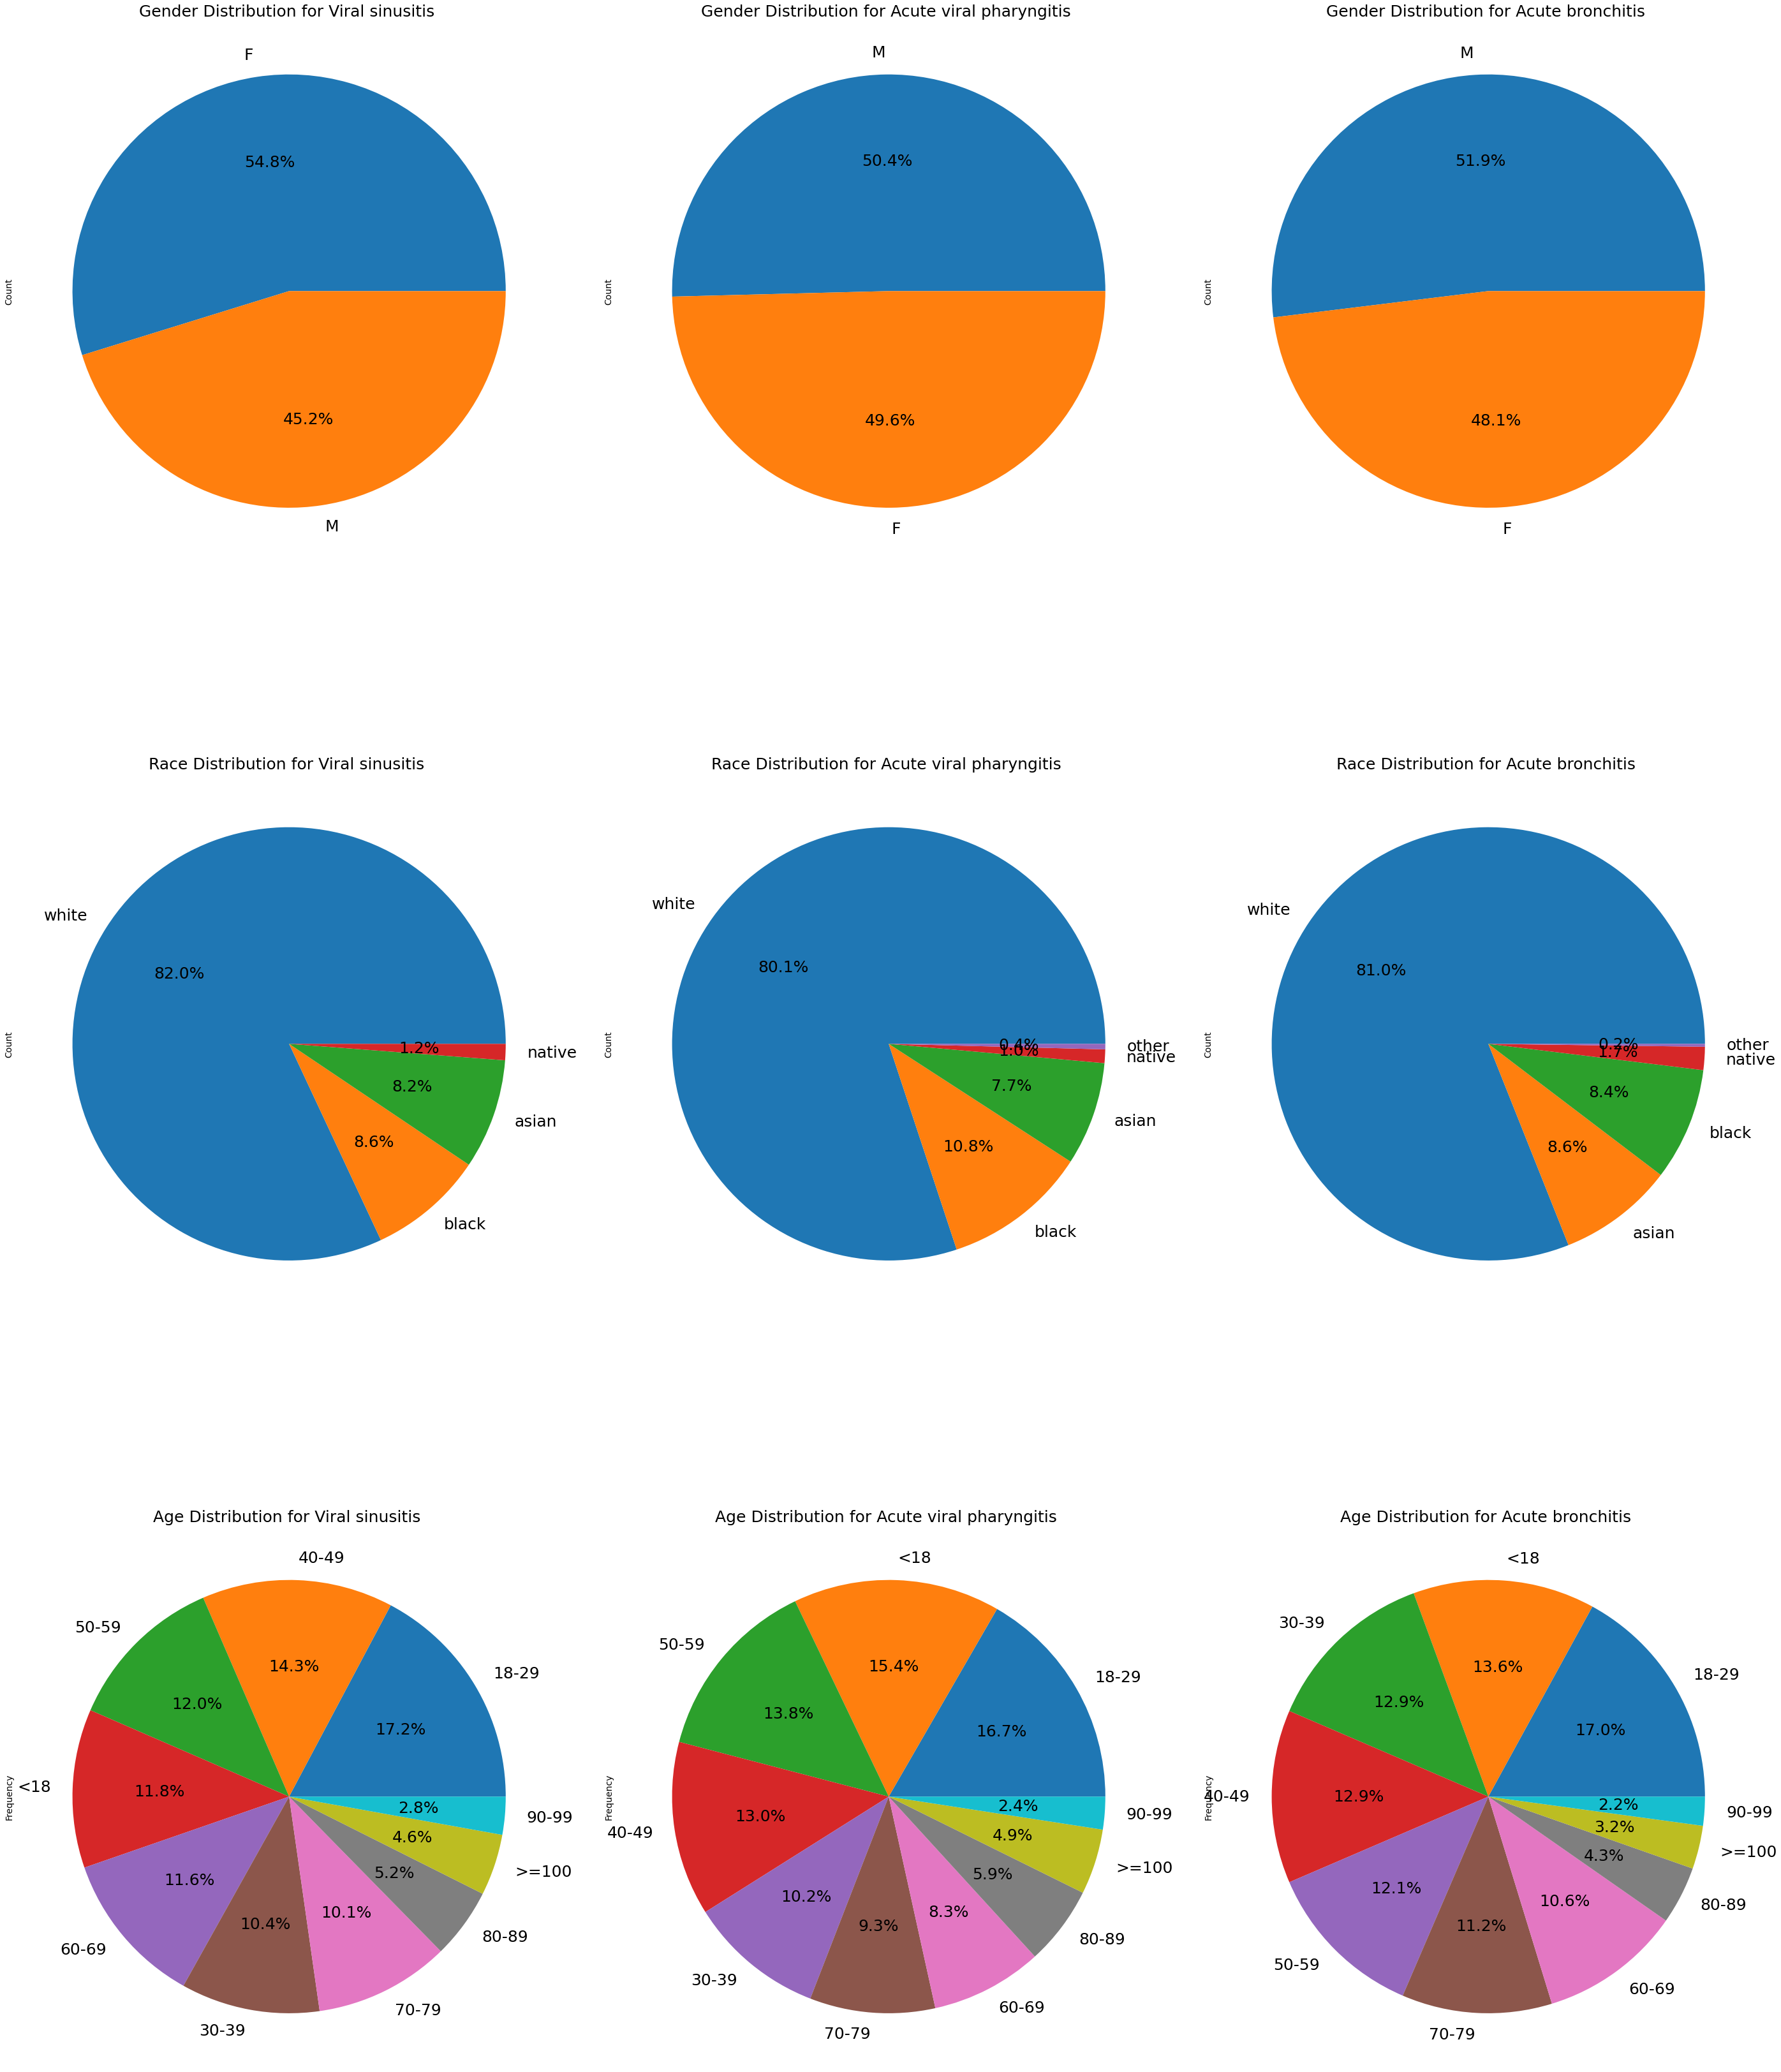

In [19]:
def condition_age_distribution(condition, patients, conditions):
    condition_patients = conditions.loc[conditions['DESCRIPTION'] == condition, 'PATIENT']
    demographics = patients.loc[patients['Id'].isin(condition_patients), ['BIRTHDATE']]
    demographics['AGE'] = (pd.to_datetime('now') - pd.to_datetime(demographics['BIRTHDATE'])).astype('<m8[Y]').astype(int)
    demographics.drop(columns=['BIRTHDATE'], inplace=True)

    # Bin ages into groups
    age_bins = [0, 18, 30, 40, 50, 60, 70, 80, 90, 100, np.inf]
    age_labels = ['<18', '18-29', '30-39', '40-49', '50-59', '60-69', '70-79', '80-89', '90-99', '>=100']
    age_counts = pd.cut(demographics['AGE'], bins=age_bins, labels=age_labels, include_lowest=True).value_counts()

    return age_counts

fig, axes = plt.subplots(3, len(top_conditions), figsize=(40, 50))
fig.tight_layout(pad=6)

for i, condition in enumerate(top_conditions):
    demographics = condition_demographics(condition, patients, conditions)

    # Plotting the gender distribution as a pie chart
    gender_counts = demographics['GENDER'].value_counts()
    axes[0, i].pie(gender_counts, labels=gender_counts.index, textprops={'fontsize': 25}, autopct='%1.1f%%')
    axes[0, i].set_title(f"Gender Distribution for {condition.replace('(disorder)', '')}", fontsize=25)
    axes[0, i].set_ylabel("Count", fontsize=14)

    # Plotting the race distribution as a pie chart
    race_counts = demographics['RACE'].value_counts()
    axes[1, i].pie(race_counts, labels=race_counts.index, textprops={'fontsize': 25}, autopct='%1.1f%%')
    axes[1, i].set_title(f"Race Distribution for {condition.replace('(disorder)', '')}", fontsize=25)
    axes[1, i].set_ylabel("Count", fontsize=14)
    


    # Plotting the age distribution as a pie chart
    age_counts = condition_age_distribution(condition, patients, conditions)
    axes[2, i].pie(age_counts, labels=age_counts.index, textprops={'fontsize': 25}, autopct='%1.1f%%')
    axes[2, i].set_title(f"Age Distribution for {condition.replace('(disorder)', '')}", fontsize=25)
    axes[2, i].set_ylabel("Frequency", fontsize=14)
    

plt.show()


# Three models that can be used in a clinical setting to improve care using a machine learning perspective using synthetic dataset comprised of Electronic Health Records

1.	Can we use machine learning to Predicting antibiotic prescriptions for viral infections  and to identify patterns in medication and procedure usage that are associated with better outcomes for patients with these conditions, and use this information to optimize treatment plans?
2. Can we use machine learning to predict which patients are at highest risk of developing one of these conditions based on their medical and demographic history, and provide targeted preventative care to reduce their risk?
3.	Can we use machine learning to Predicting diagnosis based on demographic and medical information?